<a href="https://colab.research.google.com/github/Dhivya323/Cracking-the-market-code-with-AI-driven-stock-price-prediction-using-time-series-analysis./blob/main/Copy_of_Cracking_the_Market_Code_with_AI_Driven_Stock_Price_Prediction_Using_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

# Download Reliance stock data (RELIANCE.NS is the ticker for NSE)
data = yf.download('RELIANCE.NS', start='2020-01-01', end='2024-12-31')

# Show the first few rows
print(data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open      Volume
Ticker     RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
Date                                                                  
2020-01-01  682.725769  690.640266  680.871572  686.524733    14004468
2020-01-02  694.348816  696.904081  683.811247  683.811247    17710316
2020-01-03  695.185486  697.220641  688.786033  693.308586    20984698
2020-01-06  679.062561  691.002084  677.479649  687.429302    24519177
2020-01-07  689.509644  693.986972  684.489563  686.976961    16683622


In [ ]:
data.to_csv('reliance_stock.csv')

In [ ]:
close_prices = data['Close'].values
close_prices = close_prices.reshape(-1, 1)  # reshape for scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices)

In [ ]:
import numpy as np

X_train = []
y_train = []

for i in range(60, len(scaled_data)):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape for LSTM input: (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

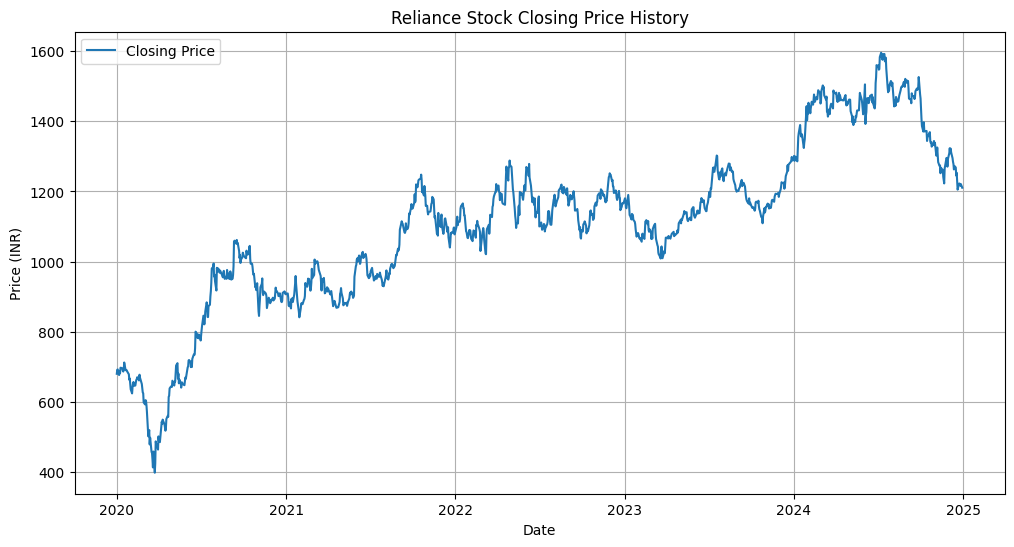

In [ ]:
import matplotlib.pyplot as plt

# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price')
plt.title('Reliance Stock Closing Price History')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()

# LSTM layer with 50 units
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Another LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))  # Predicting the next closing price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 0.1272
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0072
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0054
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0044
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0044
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0040
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0042
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0042
Epoch 9/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0038
Epoch 10/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0038
Epoch 11/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0038
Epoch 12/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0037
Epoch 13/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0041
Epoch 14/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0033
Epoch 15/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0039
Epoc

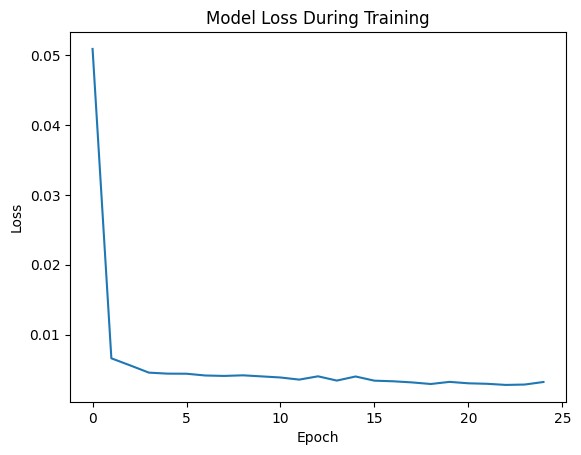

In [ ]:

#optional
plt.plot(history.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Use the last 60 days of data to predict future values
test_data = scaled_data[-60:]  # last 60 days
X_test = []

X_test.append(test_data)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:

#prediction
predicted_price = model.predict(X_test)
# Inverse transform to get actual price
predicted_price = scaler.inverse_transform(predicted_price)
print("Predicted next day price:", predicted_price[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
Predicted next day price: 1210.919


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


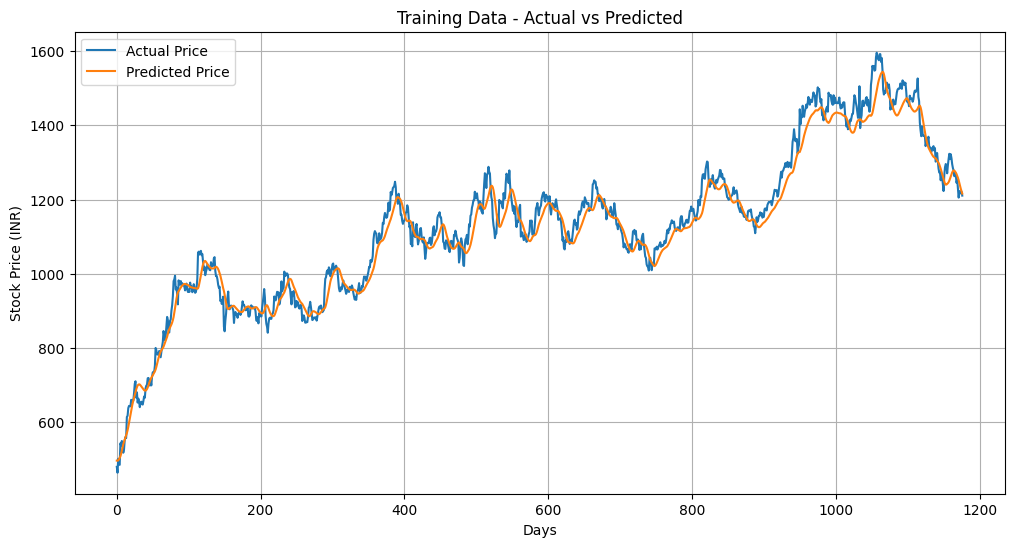

In [ ]:
# Predict on entire training set to compare
train_predict = model.predict(X_train)
train_predict = scaler.inverse_transform(train_predict)

# Actual training prices
actual_prices = scaler.inverse_transform(y_train.reshape(-1, 1))

# Plotting
plt.figure(figsize=(12,6))
plt.plot(actual_prices, label="Actual Price")
plt.plot(train_predict, label="Predicted Price")
plt.title("Training Data - Actual vs Predicted")
plt.xlabel("Days")
plt.ylabel("Stock Price (INR)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
training_data_len = int(len(scaled_data) * 0.8)

train_data = scaled_data[:training_data_len]
test_data = scaled_data[training_data_len - 60:]  # include last 60 from train

# Create X_test and y_test
X_test = []
y_test = []

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [ ]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

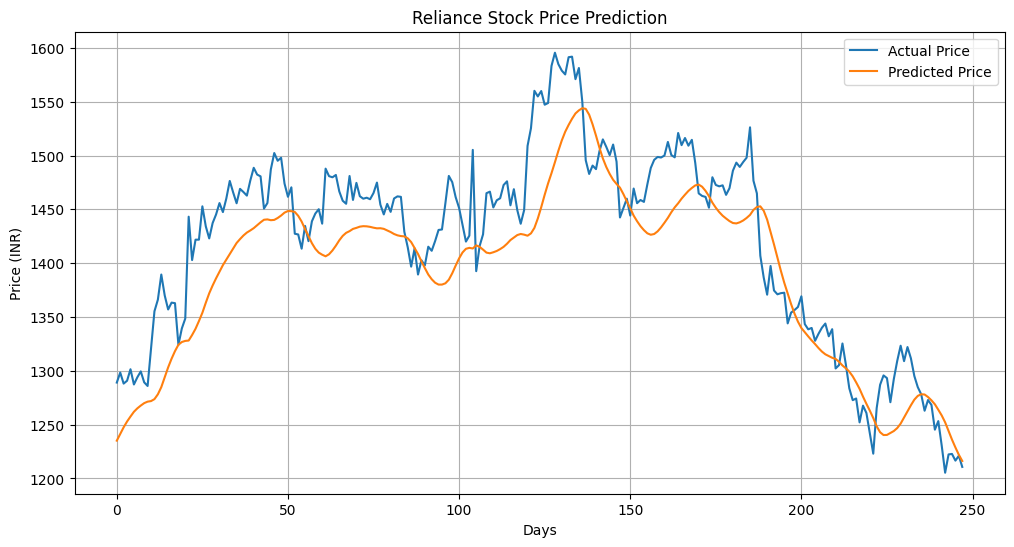

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_scaled, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_scaled, predictions))
print("RMSE:", rmse)

RMSE: 46.31241562058674


In [ ]:
pip install newsapi-python textblob

In [ ]:
from newsapi import NewsApiClient
import pandas as pd
from textblob import TextBlob

In [ ]:
newsapi = NewsApiClient(api_key='10c8c3fc730145d5a90eb586edfab514')

In [ ]:
from datetime import datetime, timedelta

# Get recent date range within allowed limit
end_date = datetime.today().date()
start_date = end_date - timedelta(days=30)

# Fetch news
all_articles = newsapi.get_everything(q='Reliance',
                                      from_param=str(start_date),
                                      to=str(end_date),
                                      language='en',
                                      sort_by='relevancy',
                                      page_size=100)

In [ ]:
# Extract date and headline
headlines = [(article['publishedAt'][:10], article['title']) for article in all_articles['articles']]
news_df = pd.DataFrame(headlines, columns=['Date', 'Headline'])

# Sentiment analysis
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

news_df['Sentiment'] = news_df['Headline'].apply(get_sentiment)

# View result
news_df.head()

,Date,Headline,Sentiment
0,2025-03-28,Don't overthink CoreWeave's IPO. It is a bellw...,0.000
1,2025-04-16,"OpenAI is on a hiring spree, and one area of i...",0.000
2,2025-03-26,College students using AI are worried their sk...,-0.350
3,2025-04-08,What is Tren de Aragua's footprint in the U.S....,0.000
4,2025-04-03,Meta and Amazon's ad businesses could get whac...,-0.125


In [ ]:
!pip install --quiet requests textblob

import requests, pandas as pd
from textblob import TextBlob
from datetime import datetime, timedelta

# 1. Define your 30-day window
end_date   = datetime.today().date()
start_date = end_date - timedelta(days=30)

# 2. Fetch Reliance headlines from NewsAPI
api_key = "10c8c3fc730145d5a90eb586edfab514"  # your key
url     = "https://newsapi.org/v2/everything"
params  = {
    "apiKey": api_key,
    "q": "Reliance",
    "from": start_date.strftime('%Y-%m-%d'),
    "to":   end_date.  strftime('%Y-%m-%d'),
    "language": "en",
    "sortBy":   "relevancy",
    "pageSize": 100
}

resp     = requests.get(url, params=params)
articles = resp.json().get("articles", [])

# 3. Build DataFrame & score sentiment
headlines = [(a['publishedAt'][:10], a['title']) for a in articles]
news_df   = pd.DataFrame(headlines, columns=['Date','Headline'])
news_df['Sentiment'] = news_df['Headline'].apply(lambda t: TextBlob(t).sentiment.polarity)
news_df['Date']      = pd.to_datetime(news_df['Date']).dt.date.astype(str)

# 4. Average multiple headlines per day
daily_sentiment = (
    news_df
    .groupby('Date', as_index=False)['Sentiment']
    .mean()
)

print("Daily sentiment sample:")
print(daily_sentiment.head())

Daily sentiment sample:
         Date  Sentiment
0  2025-03-26   0.033333
1  2025-03-27   0.055556
2  2025-03-28   0.078571
3  2025-03-29   0.159375
4  2025-03-30   0.182292


In [ ]:
!pip install --quiet yfinance

import yfinance as yf
import pandas as pd

# Use the SAME 30-day window
start_str = start_date.strftime('%Y-%m-%d')
end_str   = end_date.  strftime('%Y-%m-%d')

# 1. Download Reliance stock prices
stock_df = yf.download('RELIANCE.NS', start=start_str, end=end_str)

# 2. Reset index & flatten columns
stock_df.reset_index(inplace=True)
stock_df.columns = [c[0] if isinstance(c, tuple) else c for c in stock_df.columns]

# 3. Format Date
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date.astype(str)

print("Stock data sample:")
print(stock_df[['Date','Close']].head())

[*********************100%***********************]  1 of 1 completed

Stock data sample:
         Date        Close
0  2025-03-26  1273.050049
1  2025-03-27  1278.199951
2  2025-03-28  1275.099976
3  2025-04-01  1252.599976
4  2025-04-02  1251.150024


In [ ]:
import pandas as pd

merged_df = pd.merge(
    stock_df[['Date','Close']],
    daily_sentiment,
    on='Date',
    how='left'
)
merged_df['Sentiment'] = merged_df['Sentiment'].fillna(0)

print("Merged data sample:")
print(merged_df.head())

Merged data sample:
         Date        Close  Sentiment
0  2025-03-26  1273.050049   0.033333
1  2025-03-27  1278.199951   0.055556
2  2025-03-28  1275.099976   0.078571
3  2025-04-01  1252.599976   0.000000
4  2025-04-02  1251.150024   0.075000


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1) Extract and scale features
features = merged_df[['Close', 'Sentiment']].values
scaler   = MinMaxScaler(feature_range=(0, 1))
scaled   = scaler.fit_transform(features)

# 2) Build 60-day sequences
window = 60
X, y  = [], []
for i in range(window, len(scaled)):
    X.append(scaled[i-window:i])
    y.append(scaled[i, 0])  # predicting the 'Close' value

X = np.array(X)
y = np.array(y)

# 3) Train/test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Shapes → X_train:", X_train.shape, "X_test:", X_test.shape)
print("           y_train:", y_train.shape, "y_test:", y_test.shape)

Shapes → X_train: (0,) X_test: (0,)
           y_train: (0,) y_test: (0,)


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1) Extract and scale features
features = merged_df[['Close', 'Sentiment']].values
scaler   = MinMaxScaler(feature_range=(0, 1))
scaled   = scaler.fit_transform(features)

# 2) Build 10-day sequences
window = 10
X, y  = [], []
for i in range(window, len(scaled)):
    X.append(scaled[i-window:i])
    y.append(scaled[i, 0])  # predict 'Close'

X = np.array(X)
y = np.array(y)

# 3) Train/test split (80/20)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Shapes → X_train:", X_train.shape, "X_test:", X_test.shape)
print("           y_train:", y_train.shape, "y_test:", y_test.shape)

Shapes → X_train: (6, 10, 2) X_test: (2, 10, 2)
           y_train: (6,) y_test: (2,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense

model = Sequential([
    # 10 timesteps, 2 features (Close + Sentiment)
    Input(shape=(X_train.shape[1], X_train.shape[2])),

    # First LSTM layer
    LSTM(50, return_sequences=True),
    Dropout(0.2),

    # Second LSTM layer
    LSTM(50, return_sequences=False),
    Dropout(0.2),

    # Output layer
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 10, 50)         │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,851 (120.51 KB)

 Trainable params: 30,851 (120.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20,         # you can adjust epochs as needed
    batch_size=1,      # small batch size for this small dataset
    validation_data=(X_test, y_test),
    verbose=2
)

Epoch 1/20
6/6 - 3s - 568ms/step - loss: 0.4026 - val_loss: 0.5725
Epoch 2/20
6/6 - 0s - 21ms/step - loss: 0.1736 - val_loss: 0.1801
Epoch 3/20
6/6 - 0s - 24ms/step - loss: 0.0925 - val_loss: 0.0414
Epoch 4/20
6/6 - 0s - 31ms/step - loss: 0.1186 - val_loss: 0.0560
Epoch 5/20
6/6 - 0s - 35ms/step - loss: 0.0449 - val_loss: 0.0558
Epoch 6/20
6/6 - 0s - 34ms/step - loss: 0.0819 - val_loss: 0.0866
Epoch 7/20
6/6 - 0s - 33ms/step - loss: 0.0514 - val_loss: 0.0692
Epoch 8/20
6/6 - 0s - 45ms/step - loss: 0.0748 - val_loss: 0.0710
Epoch 9/20
6/6 - 0s - 53ms/step - loss: 0.0358 - val_loss: 0.0810
Epoch 10/20
6/6 - 0s - 35ms/step - loss: 0.0407 - val_loss: 0.0719
Epoch 11/20
6/6 - 0s - 52ms/step - loss: 0.0625 - val_loss: 0.0566
Epoch 12/20
6/6 - 0s - 37ms/step - loss: 0.0460 - val_loss: 0.0664
Epoch 13/20
6/6 - 0s - 24ms/step - loss: 0.0610 - val_loss: 0.0386
Epoch 14/20
6/6 - 0s - 19ms/step - loss: 0.0333 - val_loss: 0.0441
Epoch 15/20
6/6 - 0s - 24ms/step - loss: 0.0308 - val_loss: 0.0264
Epo

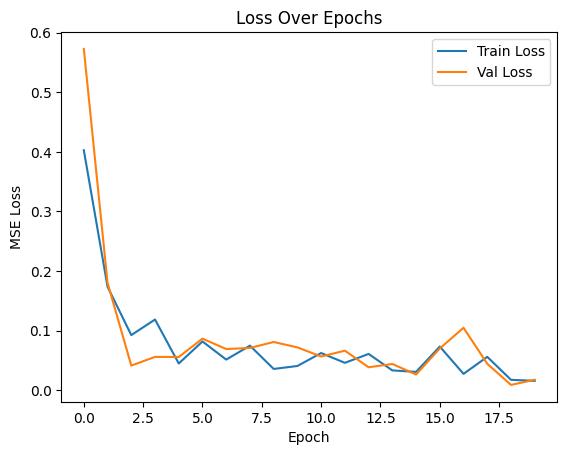

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],  label='Train Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# 1. Predict on the test set
predicted = model.predict(X_test).flatten()

# 2. Compute RMSE (on normalized scale)
rmse = np.sqrt(mean_squared_error(y_test, predicted))
print(f"Test RMSE (normalized): {rmse:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
Test RMSE (normalized): 0.1330


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


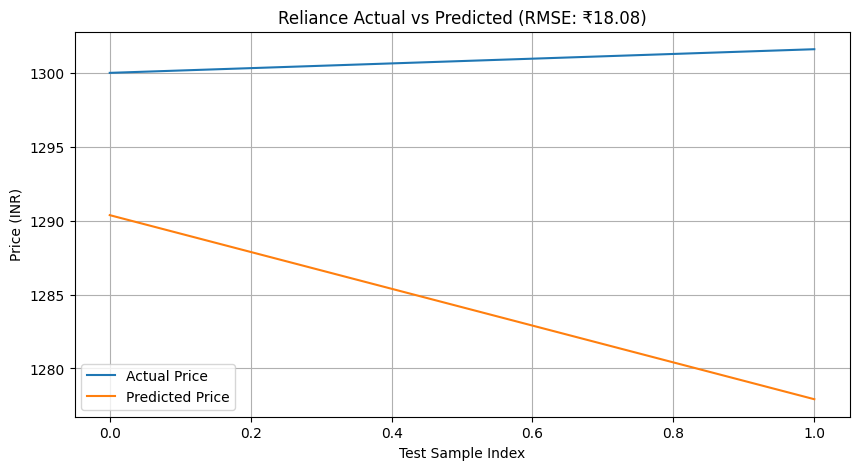

Test RMSE (INR): ₹18.08


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 1) Re-compute normalized predictions
preds_norm = model.predict(X_test).flatten().reshape(-1, 1)

# 2) Grab the corresponding Sentiment values for your test samples
#    (they’re the 2nd feature in merged_df; we take the last len(y_test) rows)
sentiment_test = merged_df['Sentiment'].values[-len(y_test):].reshape(-1, 1)

# 3) Build two-column arrays to inverse-scale back to INR
preds_pair   = np.hstack([preds_norm, sentiment_test])
actual_pair  = np.hstack([y_test.reshape(-1,1), sentiment_test])

# 4) Inverse transform
preds_real   = scaler.inverse_transform(preds_pair)[:, 0]
actual_real  = scaler.inverse_transform(actual_pair)[:, 0]

# 5) Compute RMSE in INR
rmse_inr = np.sqrt(mean_squared_error(actual_real, preds_real))

# 6) Plot Actual vs Predicted Prices
plt.figure(figsize=(10,5))
plt.plot(actual_real, label='Actual Price')
plt.plot(preds_real,   label='Predicted Price')
plt.title(f'Reliance Actual vs Predicted (RMSE: ₹{rmse_inr:.2f})')
plt.xlabel('Test Sample Index')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

# 7) Print the RMSE
print(f"Test RMSE (INR): ₹{rmse_inr:.2f}")